Melakukan import libraries yang dibutukan

In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
data=pd.read_excel('D:\Skripsi\Skenario Data\Skenario2\data_sentiment.xlsx')
del data['Unnamed: 0']
data

,created at,username,text,preprocessed,english,sentiment
0,2022-11-02,rudiartraa,"yaah , udah selesai nih Bjorka Bjorkaan nya ?",selesai nih bjorka bjorkaan,finished bjorka bjorkaan,Neutral
1,2022-11-02,oi_filix315,"Kadang gua mikir sekilas pp gua mirip bjorka, ...",kadang gue pikir kilas pp gue bjorka gue pakai pp,sometimes I think my pp flash is bjorka I use pp,Neutral
2,2022-11-01,falahsanjaya_,Knp ga ada yg jadi Bjorka Halloween party kema...,bjorka halloween pay kemarin,Bjorka Halloween Pay yesterday,Negative
3,2022-11-01,namanyaajess,"Beritanya taik, mau ferdi sambo, mau bjorka, m...",berita tai ferdi sambo bjorka lapar tren topik...,News Tai Ferdy Sambo Bjorka Hungry Trend Topic...,Negative
4,2022-11-01,namakubaim,Apa kabar Bjorka?,kabar bjorka,Bjorka news,Neutral
...,...,...,...,...,...,...
19995,2022-09-11,SecretAdmirerOP,hari ini ada 2 hari bersejarah\n9/11\nbjorka s...,sejarah bjorka spill data bunuh munir tau,History of Bjorka Spill Munir Kill Data Tau,Negative
19996,2022-09-11,yonforger,"lah anjir aku baru tau bjorka tu hacker, kirai...",anjir tau bjorka hacker bubur kacang ijo tukan...,Anjir Tau Bjorka Hacker Green Beans Porridge S...,Neutral
19997,2022-09-11,semangkalucu,kata w mending bjorka ngewarin tiket the link aja,gue mending bjorka ngewarin tiket the link,I better bjorka to take the link the link,Positive
19998,2022-09-11,choaciao,Bang bjorka bisa ga si hek hati doi biar sama ...,bang bjorka sih hek hati biar ghuweh,"bang bjorka, hek heart so ghuweh",Positive


In [3]:
data=data[['preprocessed','sentiment']]
data

,preprocessed,sentiment
0,selesai nih bjorka bjorkaan,Neutral
1,kadang gue pikir kilas pp gue bjorka gue pakai pp,Neutral
2,bjorka halloween pay kemarin,Negative
3,berita tai ferdi sambo bjorka lapar tren topik...,Negative
4,kabar bjorka,Neutral
...,...,...
19995,sejarah bjorka spill data bunuh munir tau,Negative
19996,anjir tau bjorka hacker bubur kacang ijo tukan...,Neutral
19997,gue mending bjorka ngewarin tiket the link,Positive
19998,bang bjorka sih hek hati biar ghuweh,Positive


In [4]:
data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25232\1650668707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])


,preprocessed,sentiment
0,selesai nih bjorka bjorkaan,0
1,kadang gue pikir kilas pp gue bjorka gue pakai pp,0
2,bjorka halloween pay kemarin,1
3,berita tai ferdi sambo bjorka lapar tren topik...,1
4,kabar bjorka,0
...,...,...
19995,sejarah bjorka spill data bunuh munir tau,1
19996,anjir tau bjorka hacker bubur kacang ijo tukan...,0
19997,gue mending bjorka ngewarin tiket the link,2
19998,bang bjorka sih hek hati biar ghuweh,2


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#vectorizer = TfidfVectorizer()
##vectors = vectorizer.fit_transform(data['preprocessed'])
#feature_names = vectorizer.get_feature_names()
#dense = vectors.todense()
#denselist=dense.tolist()

In [6]:
max_len=10
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
tokenizer=Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(data['preprocessed'])

In [8]:
sequences=tokenizer.texts_to_sequences(data['preprocessed'])
padded=pad_sequences(sequences=sequences,padding=padding_type,truncating=trunc_type,maxlen=max_len)
temp=0
kamus={}
for item in sequences:
    coba=len(item)
    if coba not in kamus:
        kamus[coba]=1
    else:
        kamus[coba]+=1
sorted(kamus.items())

TypeError: unhashable type: 'list'

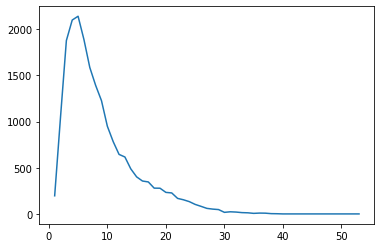

In [8]:
import matplotlib.pylab as plt

lists = sorted(kamus.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [9]:
sequences=tokenizer.texts_to_sequences(data['preprocessed'])
padded=pad_sequences(sequences=sequences,padding=padding_type,truncating=trunc_type,maxlen=max_len)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded,data['sentiment'],test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16000, 10), (4000, 10), (16000,), (4000,))

In [11]:
y_train= tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16000, 10), (4000, 10), (16000, 3), (4000, 3))

In [12]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [13]:
def createSimpleModel(skenario):
    if skenario==1:
        model=tf.keras.models.Sequential([
        tf.keras.layers.Embedding(len(tokenizer.word_index), 16, input_length=max_len),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3,activation='softmax')
        ])
        model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy',f1_m])
    
    elif skenario ==2:
        model=tf.keras.models.Sequential([
            tf.keras.layers.Embedding(len(tokenizer.word_index),16,input_length=max_len),
            tf.keras.layers.LSTM(64,return_sequences=True,activation='tanh'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(3, activation='softmax')
        ])
        model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy',f1_m])
    elif skenario ==3:
        model=tf.keras.models.Sequential([
        tf.keras.layers.Embedding(len(tokenizer.word_index),16,input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True,activation='tanh')),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(3,activation='softmax')
        ])
        model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy',f1_m])
    model.summary()
    return model


In [ ]:
#from scikeras.wrappers import KerasClassifier
##from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#estimator = KerasClassifier(build_fn=createModel(3), epochs=10, verbose=0)
#kfold = KFold(n_splits=3, shuffle=True)
#results = cross_val_score(estimator, x_train, y_train, cv=kfold)
#print(results.mean())

In [14]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [17]:
model=createSimpleModel(2)
history=model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 16)            281360    
                                                                 
 lstm (LSTM)                 (None, 10, 64)            20736     
                                                                 
 flatten_1 (Flatten)         (None, 640)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 1923      
                                                                 
Total params: 304,019
Trainable params: 304,019
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
400/400 [==============================] - 9s 13ms/step - loss: 0.8718 - accuracy: 0.5877 - f1_m: 0.5012 - val_loss: 0.7638 - val_accuracy: 0.6656 - val_f1_m: 0.6382
Epo

In [16]:
temp=model.evaluate(x_test,y_test)
temp

125/125 [==============================] - 1s 4ms/step - loss: 0.1579 - accuracy: 0.7165 - f1_m: 0.7126


[0.1579413115978241, 0.7164999842643738, 0.7125792503356934]

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
predict=model.predict(x_test)
confusion=confusion_matrix(np.argmax(y_test,axis=1),np.argmax(predict,axis=1))
display=ConfusionMatrixDisplay(confusion_matrix=confusion)
display.plot()

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history):
  figure, axis = plt.subplots(2, 2)
  figure.set_size_inches(18.5, 10.5, forward=True)

  axis[0,0].plot(history.history['accuracy'])
  axis[0,0].plot(history.history['val_accuracy'])
  axis[0,0].set_title('Accuracy')
  axis[0,0].legend(['accuracy','val_accuracy'])

  axis[0,1].plot(history.history['loss'])
  axis[0,1].plot(history.history['val_loss'])
  axis[0,1].set_title('Loss')
  axis[0,1].legend(['loss','val_loss'])

  axis[1,0].plot(history.history['f1_m'])
  axis[1,0].plot(history.history['val_f1_m'])
  axis[1,0].set_title('F1-Score')
  axis[1,0].legend(['f1_m','val_f1_m'])
  plt.show()

In [ ]:
plot_graphs(history=history)